# Heterogeniety in FL

Necessary modules are imported in the following cell. 
Utility functions for federated algorithm is stored in IRM_methods.py file which is also imported in the following cell

In [1]:
import tensorflow as tf
import numpy as np
import argparse
import IPython.display as display
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import copy as cp
from sklearn.model_selection import KFold
from IRM_methods import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

#comment following line if requred amount of gpu is available
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

D:\Users\charm\anaconda3\envs\deepLearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\charm\anaconda3\envs\deepLearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\charm\anaconda3\envs\deepLearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\charm\anaconda3\envs\deepLearning\lib\site-

Number of environments including the server where representation learner model is stored are defined in following cell. Currently it is set to 4. 

In [2]:
n_e = 4  # number of environments

Next cell represents number of classes predicted by the neural network. Current RIS dataset has 5 classes which is defined below.

In [3]:
num_classes = 2

In the next cell model creation is done. 3 models for prediction for each client and one model for representation learner is created here.

In [4]:
# List of models - last one is the representation (common)
model_list = []
for e in range(n_e):
    if(e<n_e-1): 
        model_list.append( keras.Sequential([
            keras.layers.Flatten(input_shape=(390,1)),
            keras.layers.Dense(390, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.00125)),
            keras.layers.Dropout(0.75),
            keras.layers.Dense(390, activation='relu',kernel_regularizer=keras.regularizers.l2(0.00125)),
            keras.layers.Dropout(0.75),
            keras.layers.Dense(num_classes)
        ]))
    if(e==n_e-1):
        model_list.append(keras.Sequential([
        
        keras.layers.Dense(390,input_shape=(400,), activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.00125)),
      ]))

Required hyperparameters are defined in the following cell

In [5]:
# Hyperparameters
num_epochs       = 5
batch_size       = 256
termination_acc  = 0.6
warm_start       = 100
learning_rate    = 2.5e-4

Data loading from the RIS dataset which is in the 'RIS_Data' is done here. Each 'X_i.npy' and 'y_i.npy' file represents dataset for the i^th environment. i = 1 to 3 is used for training. Each dataset represents heterogenious distribution of data. 

In [6]:
c = []
for i in range(1, n_e+1):
    
    X = np.load('RIS_Data/X' + str(i)+'.npy')
    y = np.load('RIS_Data/y' + str(i)+'.npy')
    
    c.append((X,y))
    

variable_irm_game_model method class is intiated in the following cell. The class holds methods fit and evaluate. fit method is for training the ML model. When initiating the class necessary parameters are fed, including the models created as seen from the following code.

In [7]:
# create the game
V_game = variable_irm_game_model(model_list, learning_rate, num_epochs, batch_size, termination_acc, warm_start) 

Now training process begins with the following cell. X1-X3 data files are used for training, which corresponds to the 3 different environments. And training accuracy against each batch of training is plotted afterwards.

Trained models for each environment is saved as 

starting training
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4


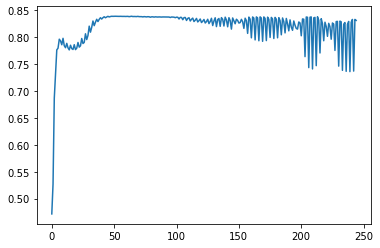

In [8]:
# train
V_game.fit(c)
plt.plot(V_game.train_accuracy_results)

X4 and y4 dataset is used for evaluation of the models. In the next cell loading of the dataset for evaluation is done.

In [9]:
# load data for evaluation
X = np.load('RIS_Data/X4.npy')
y = np.load('RIS_Data/y4.npy')

c_eval = [(X,y)]

Evaluation on the dataset is done in next cell and plots for accuracy is representated

In [10]:
V_game.evaluate(c_eval) 

# print train and test accuracy
print ("Training accuracy " + str(V_game.train_acc)) 
print ("Testing accuracy " + str(V_game.test_acc))

Training accuracy 0.8314599990844727
Testing accuracy 0.8552799820899963


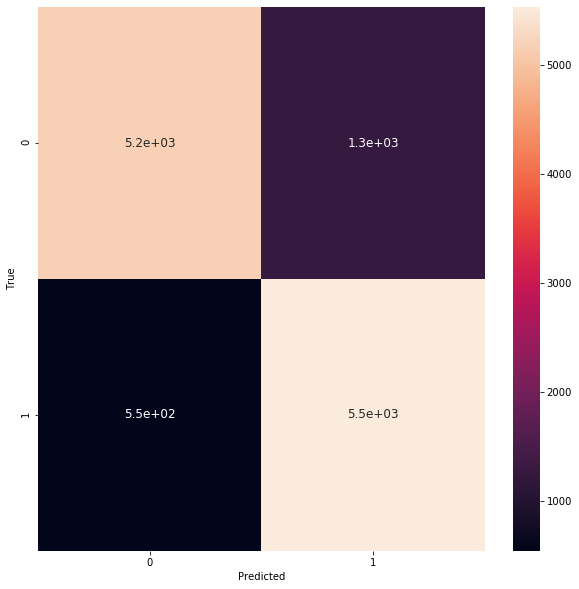

In [11]:
cm = confusion_matrix(V_game.y_test, V_game.ypred)
cm = pd.DataFrame(cm, range(2),range(2))
plt.figure(figsize = (10,10))

s = sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
s.set(xlabel='Predicted', ylabel='True')
plt.show()